# Dataset Description

1. 'timestamp': This column represents the timestamp of an event or interaction, indicating when it occurred.
2. 'eventType': This column describes the type of event or interaction that took place. It could include values such as 'view',     'like', 'share', 'comment', or other event types related to user interactions with articles.
3. 'contentId': This column contains a unique identifier for each article or content item. It serves as a key to associate user     interactions with specific articles.
4. 'authorPersonId': This column represents the unique identifier of the author or person associated with the article.
5. 'authorSessionId': This column contains a unique identifier for the author's session or interaction with the system.
6. 'authorUserAgent': This column captures information about the author's user agent, which typically represents the web browser or client used to access the system.
7. 'authorRegion': This column specifies the region or geographic location of the author.
8. 'authorCountry': This column indicates the country of the author.
9. 'contentType': This column describes the type of content, which could include values such as 'article', 'video', 'image', or     other content types.
10. 'url': This column contains the URL or link associated with the article.
11. 'title': This column stores the title or headline of the article.
12. 'text': This column contains the main text or body of the article.
13. 'lang': This column represents the language of the article, typically represented by a two-letter language code.
14. 'personId': This column contains a unique identifier for each user or person interacting with the system.
15. 'sessionId': This column represents a unique identifier for a user session, indicating a specific period of interaction with the system.
16. 'userAgent': This column captures information about the user's user agent, similar to 'authorUserAgent'.
17. 'userRegion': This column specifies the region or geographic location of the user.
18. 'userCountry': This column indicates the country of the user.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
shared_articles_df = pd.read_csv('shared_articles.csv')

In [3]:
shared_articles_df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [4]:
shared_articles_df.columns

Index(['timestamp', 'eventType', 'contentId', 'authorPersonId',
       'authorSessionId', 'authorUserAgent', 'authorRegion', 'authorCountry',
       'contentType', 'url', 'title', 'text', 'lang'],
      dtype='object')

In [5]:
print('Shape of shared_atricles_df:',shared_articles_df.shape)

Shape of shared_atricles_df: (3122, 13)


Text(0.5, 1.0, 'Event Types')

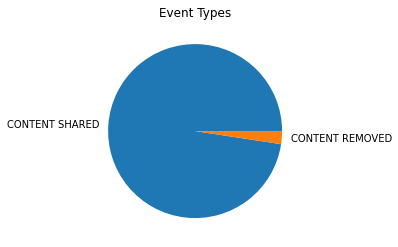

In [6]:
# Plotting the pie chart
shared_articles_df['eventType'].value_counts().plot(kind='pie')

# Removing the label
plt.ylabel('')  # Remove the y-label
plt.xlabel('')  # Remove the x-label
plt.title('Event Types')  # Add a title to the chart

I will filter out the articles removed as they will not help in the recommendation.

In [7]:
shared_articles_df = shared_articles_df[shared_articles_df['eventType'] == 'CONTENT SHARED']

In [8]:
shared_articles_df.sample(5)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
2675,1477660745,CONTENT SHARED,1642787330067525131,-2820994773540913369,2754938799836633114,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,http://www.valor.com.br/empresas/4757687/dasa-...,Dasa compra maior rede de laboratórios do Nord...,SÃO PAULO - A Diagnósticos da América S.A. (Da...,pt
33,1459271181,CONTENT SHARED,2255603060224026824,4340306774493623681,-7292854281461484137,NaN,NaN,NaN,HTML,http://www.newsbtc.com/2016/03/29/french-senat...,French Senate Will Debate on Bitcoin Regulation,While the efforts by the French Senate to comb...,en
1256,1464982050,CONTENT SHARED,-5410531116380081703,2416280733544962613,3686082102675618374,NaN,NaN,NaN,HTML,http://www.mckinsey.com/industries/consumer-pa...,Meet the new Brazilian consumer,Amid one of the country's most severe recessio...,en
2834,1481047299,CONTENT SHARED,6407605752151817831,-8845298781299428018,19304028560323633,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,SP,BR,HTML,https://techcrunch.com/2016/12/06/seenit-wins-...,And the winner of Startup Battlefield at Disru...,4K movies come to the Google Play Movies & TV ...,en
1961,1470162319,CONTENT SHARED,-908052164352446106,-2820994773540913369,1807329753509412871,NaN,NaN,NaN,HTML,http://hospitalar.com/pt/portal-de-noticias/bl...,IoT a favor do relacionamento médico-paciente,IoT a favor do relacionamento médico-paciente ...,pt


In [9]:
# Percentage of null values in shared_articles_df
print((shared_articles_df.isnull().sum()/shared_articles_df.isnull().sum().sum())*100)

timestamp           0.000000
eventType           0.000000
contentId           0.000000
authorPersonId      0.000000
authorSessionId     0.000000
authorUserAgent    33.333333
authorRegion       33.333333
authorCountry      33.333333
contentType         0.000000
url                 0.000000
title               0.000000
text                0.000000
lang                0.000000
dtype: float64


In [10]:
# Time when an event has occurred
shared_articles_df['timestamp'] # this column is not helpful for our analysis so i will drop it

1       1459193988
2       1459194146
3       1459194474
4       1459194497
5       1459194522
           ...    
3117    1487946604
3118    1487947067
3119    1488223224
3120    1488300719
3121    1488307871
Name: timestamp, Length: 3047, dtype: int64

In [11]:
# Article shared or article removed at a particular timestamp
shared_articles_df['eventType'].unique()

array(['CONTENT SHARED'], dtype=object)

In [12]:
# Article Id
shared_articles_df['contentId'] # this id has no use for my analysis

1      -4110354420726924665
2      -7292285110016212249
3      -6151852268067518688
4       2448026894306402386
5      -2826566343807132236
               ...         
3117    9213260650272029784
3118   -3295913657316686039
3119    3618271604906293310
3120    6607431762270322325
3121    4109618890343020064
Name: contentId, Length: 3047, dtype: int64

In [13]:
# Author Id
print(shared_articles_df['authorPersonId'])
print('\n')
print('No. of unique values:',shared_articles_df['authorPersonId'].nunique())

1       4340306774493623681
2       4340306774493623681
3       3891637997717104548
4       4340306774493623681
5       4340306774493623681
               ...         
3117    3609194402293569455
3118    6960073744377754728
3119    1908339160857512799
3120   -1393866732742189886
3121    3891637997717104548
Name: authorPersonId, Length: 3047, dtype: int64


No. of unique values: 252


In [14]:
# Session ID of the author. The author might have created the articles in different sessions.
print(shared_articles_df['authorSessionId'].head(5))
print('\n')
print('No. of unique values:',shared_articles_df['authorSessionId'].nunique())
# Since this is contextual and we focus on attributes rather than transactional details, we will remove this column.

1    8940341205206233829
2    8940341205206233829
3   -1457532940883382585
4    8940341205206233829
5    8940341205206233829
Name: authorSessionId, dtype: int64


No. of unique values: 2010


In [15]:
# The browser author used.
print(shared_articles_df['authorUserAgent'].tail(5))
print('\n')
print('No. of unique values:',shared_articles_df['authorUserAgent'].nunique())

3117    Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
3118    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...
3119    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0...
3120    Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
3121    Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
Name: authorUserAgent, dtype: object


No. of unique values: 114


<AxesSubplot:>

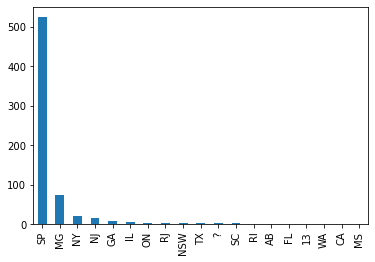

In [16]:
# states/regions of the author.
shared_articles_df['authorRegion'].value_counts().plot(kind='bar')

<AxesSubplot:>

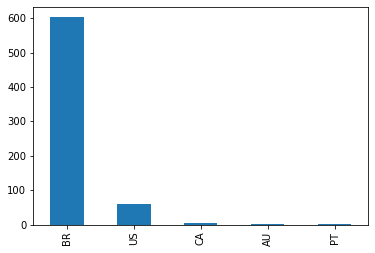

In [17]:
# Country of the author of the articles
shared_articles_df['authorCountry'].value_counts().plot(kind='bar')

<AxesSubplot:>

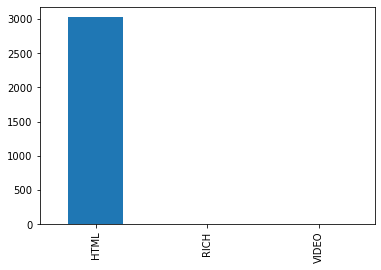

In [18]:
#  The formats articles are shared
shared_articles_df['contentType'].value_counts().plot(kind='bar')

In [19]:
# URL of the articles
shared_articles_df['url'].head()

1    http://www.nytimes.com/2016/03/28/business/dea...
2    http://cointelegraph.com/news/bitcoin-future-w...
3    https://cloudplatform.googleblog.com/2016/03/G...
4    https://bitcoinmagazine.com/articles/ibm-wants...
5    http://www.coindesk.com/ieee-blockchain-oxford...
Name: url, dtype: object

In [20]:
# Title/headline of the articles
shared_articles_df['title'].head()

1    Ethereum, a Virtual Currency, Enables Transact...
2    Bitcoin Future: When GBPcoin of Branson Wins O...
3                         Google Data Center 360° Tour
4    IBM Wants to "Evolve the Internet" With Blockc...
5    IEEE to Talk Blockchain at Cloud Computing Oxf...
Name: title, dtype: object

In [21]:
# Content of the articles
shared_articles_df['text'].head() # most critical column in our analysis

1    All of this work is still very early. The firs...
2    The alarm clock wakes me at 8:00 with stream o...
3    We're excited to share the Google Data Center ...
4    The Aite Group projects the blockchain market ...
5    One of the largest and oldest organizations fo...
Name: text, dtype: object

<AxesSubplot:>

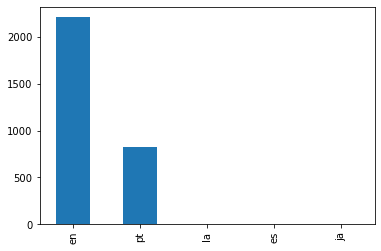

In [22]:
# language in which the article is written
shared_articles_df['lang'].value_counts().plot(kind='bar')

In [23]:
shared_articles_df = shared_articles_df[shared_articles_df['lang'] == 'en']

In [24]:
shared_articles_df.shape

(2211, 13)

In [25]:
# Data preprocessing
shared_articles_df = shared_articles_df[['contentId','authorPersonId','title', 'text','url']]

In [26]:
shared_articles_df.head()

,contentId,authorPersonId,title,text,url
1,-4110354420726924665,4340306774493623681,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,http://www.nytimes.com/2016/03/28/business/dea...
2,-7292285110016212249,4340306774493623681,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,http://cointelegraph.com/news/bitcoin-future-w...
3,-6151852268067518688,3891637997717104548,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,https://cloudplatform.googleblog.com/2016/03/G...
4,2448026894306402386,4340306774493623681,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,https://bitcoinmagazine.com/articles/ibm-wants...
5,-2826566343807132236,4340306774493623681,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,http://www.coindesk.com/ieee-blockchain-oxford...


In [27]:
shared_articles_df.isnull().sum()

contentId         0
authorPersonId    0
title             0
text              0
url               0
dtype: int64

In [28]:
shared_articles_df = shared_articles_df[['title','text','url']]

In [29]:
shared_articles_df.dtypes

title    object
text     object
url      object
dtype: object

In [30]:
shared_articles_df['text'] = shared_articles_df['text'].astype(str).apply(lambda x: x.lower())

In [31]:
# Download the WordNet lemmatization resource (if not already downloaded)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
def lemmatize(text):
    y=[]
    for i in text.split():
        y.append(lemmatizer.lemmatize(i))

    return "  ".join(y)

In [34]:
shared_articles_df['text']=shared_articles_df['text'].apply(lemmatize)

In [35]:
shared_articles_df.head()

,title,text,url
1,"Ethereum, a Virtual Currency, Enables Transact...",all of this work is still very early. ...,http://www.nytimes.com/2016/03/28/business/dea...
2,Bitcoin Future: When GBPcoin of Branson Wins O...,the alarm clock wake me at 8:00 with s...,http://cointelegraph.com/news/bitcoin-future-w...
3,Google Data Center 360° Tour,we're excited to share the google data ...,https://cloudplatform.googleblog.com/2016/03/G...
4,"IBM Wants to ""Evolve the Internet"" With Blockc...",the aite group project the blockchain ma...,https://bitcoinmagazine.com/articles/ibm-wants...
5,IEEE to Talk Blockchain at Cloud Computing Oxf...,one of the largest and oldest organizati...,http://www.coindesk.com/ieee-blockchain-oxford...


In [36]:
shared_articles_df.duplicated().sum()

20

In [37]:
shared_articles_df.drop_duplicates(inplace=True)

In [38]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Create TF-IDF matrix for the article text
tfidf_matrix = tfidf_vectorizer.fit_transform(shared_articles_df['text'])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [39]:
# Function to get top N similar articles based on text similarity
def get_similar_articles(title, cosine_sim_matrix, N):
    # Transform the input text into a TF-IDF vector
    input_vector = tfidf_vectorizer.transform([title])

    # Calculate the similarity scores between the input vector and all articles
    sim_scores = cosine_similarity(input_vector, tfidf_matrix)

    # Sort the articles based on similarity scores
    sim_scores = sim_scores.flatten()
    sorted_indices = sim_scores.argsort()[::-1]

    # Get the top N similar articles
    top_articles = sorted_indices[1:N+1]

    # Extract the desired information for the recommended articles
    recommended_articles = shared_articles_df.iloc[top_articles]
    recommended_articles = recommended_articles[['title', 'url']]

    # Return the recommended articles
    return recommended_articles


In [40]:
# Example usage
title = "Hiri wants to fix the workplace email problem."
num_recommendations = 5  # Number of recommendations to generate

recommended_articles = get_similar_articles(title, cosine_sim, num_recommendations)

In [41]:
recommended_articles

,title,url
2545,Facebook Workplace officially launches on the ...,https://9to5mac.com/2016/10/10/facebook-workpl...
674,Email Isn't The Thing You're Bad At,https://glyph.twistedmatrix.com/2016/04/email-...
1068,20 Percent Will Stop Reading Your Email If You...,http://www.inc.com/minda-zetlin/the-simple-mis...
2165,AI Is Here to Help You Write Emails People Wil...,http://www.wired.com/2016/08/boomerang-using-a...
1291,Measuring email effectiveness in retail banking,http://marketingland.com/measuring-email-effec...


In [42]:
pickle.dump(shared_articles_df,open('article_df.pkl','wb'))

In [43]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))